In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/reviews.csv
/kaggle/input/seattle/listings.csv


In [3]:
df_listings = pd.read_csv("../input/seattle/listings.csv")
df_calendar = pd.read_csv("../input/seattle/calendar.csv")
df_reviews = pd.read_csv("../input/seattle/reviews.csv")

In [ ]:
#Which neighbour has the best scores on review ratings?
df_listings = df_listings.dropna(subset = ['review_scores_rating'], how = 'all')
#df_listings.groupby(['neighbourhood'])['review_scores_rating'].mean().sort_values()

#Answer: According to reviews, Arbor Heights is the best neighbourhood to stay

top_neigh = df_listings[['neighbourhood', 'review_scores_rating']]
top_neigh = top_neigh.groupby(['neighbourhood']).mean().sort_values(by='review_scores_rating',ascending=False)
(top_neigh[:10]/top_neigh.shape[0]).plot(kind="bar",legend=None);


In [ ]:
#What day of year in Seattle has most availability? i.e. least busiest time of year in the city?
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
top_avail = df_calendar[df_calendar.available == 't'].sort_values(by=['date']);
top_avail = top_avail.drop('listing_id',axis=1)
top_avail = top_avail.drop('price',axis=1)

top_avail = top_avail.groupby(['date']).count()


top_avail.plot(kind='line', legend=None);
plt.xlabel('Month');
plt.ylabel('Availability');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,price
neighbourhood,
Alki,196.652174
Arbor Heights,118.000000
Atlantic,116.280000
Ballard,123.615023
Belltown,166.627451


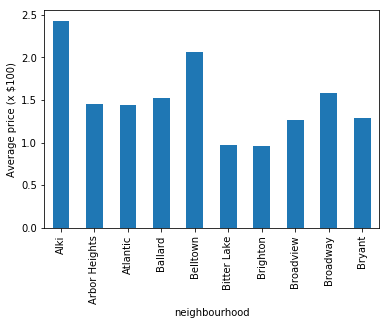

In [24]:
#What is the average price per neighbour to rent in?
fix_listings = df_listings.replace(to_replace = '[\$,]',value = '',regex=True);
top_price = fix_listings[['neighbourhood', 'price']];

top_price['price'] = top_price['price'].astype(float);
top_price = top_price.groupby(['neighbourhood']).mean()

(top_price[:10]/top_price.shape[0]).plot(kind="bar",legend=None);
plt.ylabel('Average price (x $100)')
top_price.head()